.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


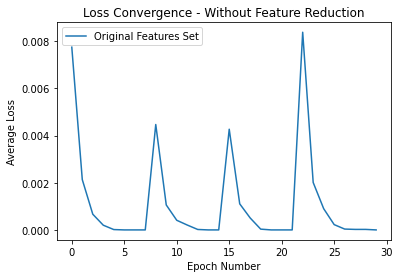

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


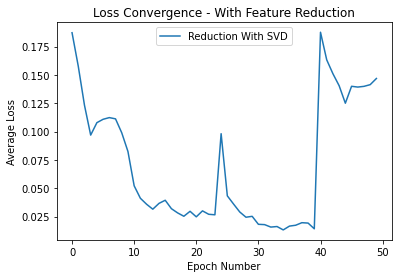

In [63]:
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics
from contextlib import redirect_stdout

def get_LossList(clf):
  #routing std_out to a string as in docs to calculate loss and epoch (Workaround, extremely slow and not recommended but works for the assignment)
  loss_values = []
  epoch_values = []
  i = 0
  f = StringIO()
  with redirect_stdout(f):
    verbose = classify(clf)
  r = (str(f.getvalue().split(" ")).split("\\n"))
  for idx in r:
    if 'loss:' in idx:
      loss_values.append(float(str(idx.split("loss:")[1]).strip("', '")))
      epoch_values.append(i)
      i+=1
  f = ""
  return loss_values, epoch_values

def classify(clf):
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  score = metrics.accuracy_score(y_test, pred)
  score1 = metrics.classification_report(y_test, pred)

#starts here
categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
#remove = ('headers', 'footers', 'quotes') uncomment and use this to remove metadata, which will be a realistic f1 score, less overfitting 
data_train = datasets.fetch_20newsgroups(subset='train', categories=categories, shuffle=True)
data_test = datasets.fetch_20newsgroups(subset='test', categories=categories, shuffle=True)
y_train, y_test = data_train.target, data_test.target
print(data_train.DESCR)
target_labels =  data_train.target_names

vectorizer = TfidfVectorizer(analyzer='word', strip_accents=ascii,min_df=0.001, max_df=0.2, stop_words='english')
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)
feature_names = vectorizer.get_feature_names()
print(len(feature_names))
print(feature_names)

clf0 = Perceptron(max_iter=100, verbose=1, warm_start=True)
loss_values_withoutFR, epoch_values_withoutFR = get_LossList(clf0)
plt.plot(epoch_values_withoutFR , loss_values_withoutFR , label = 'Original Features Set' )
plt.legend()
plt.title('Loss Convergence - Without Feature Reduction')
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.show()

sc = MaxAbsScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
tsvd = TruncatedSVD(n_components=150)
X_train = tsvd.fit_transform(X_train)
X_test = tsvd.transform(X_test)
#print(tsvd.explained_variance_ratio_)

clf1 = Perceptron(max_iter=100, verbose=1, warm_start=True)
loss_values_withFR , epoch_values_withFR  = get_LossList(clf1)

plt.plot(epoch_values_withFR , loss_values_withFR , label = 'Reduction With SVD' )
plt.legend()
plt.title('Loss Convergence - With Feature Reduction')
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.show()
